### PIC 16  A,    Winter 2021    Final Exam

You will have a 24-hour window to complete the exam, but the exam itself is designed to be completed in 3 hours.

This exam consists of 7 questions with parts.

If code is provided in a separate cell, you should execute that cell before executing your solution cell.

When you are done, submit on CCLE only this .ipynb file with your solutions. Good luck!

**Important:** Please __double-check__ your submission on CCLE and make sure that it is the correct file.

<b>1. (5 pts)</b><br>
Write a function `maxLength()` that accepts a variable number of tuples, and returns the length of the tuple with the most number of elements.

__Note:__ For maximum credit, the function should contain only one line of code.

In [ ]:
# put your code here
def maxLength(*tuples):
    return max([len(t) for t in tuples])

Test it by running the cell below. The results should be 
```
5
3
7
```

In [4]:
# DO NOT DELETE
print(maxLength((1,3,10,-1,2)))
print(maxLength((1,2),(3,2,5),(-10,1,0)))
print(maxLength((1,2),(3,2,5,2,3,3,1),(-10,1,0),(1,2,3,4,5,6)))

5
3
7


<b>2. (14 pts)</b><br>
The file `UCLA_calendar.txt` contains the 2021 UCLA Academic Calendar.
Using regular expressions, write a function ``findHolidays(s)`` that detects all the holidays in the calendar, and returns the list of holidays in the following format:<br>

```
Martin Luther King, Jr. holiday : Jan. 18

Presidents' Day holiday : Feb. 15

...
```

In [104]:
# put your code here
import re
def findHolidays(s):
    holiday_lines = re.findall(r'.+holiday.+\n',s)
    ret_str = ""
    for holiday in holiday_lines:
        name, time = holiday.split("\t")
        time = time.split(", ")[1]
        month = time.split(" ")[0][0:3] + "."
        date = time.split(" ")[1]
        ret_str += f"{name} : {month} {date}\n"

    return ret_str


(1) Test your function by running the cell below. The result should be: 
```
Martin Luther King, Jr. holiday : Jan. 18
```

In [105]:
# test your function here
# DO NOT DELETE
test_string1 = 'Martin Luther King, Jr. holiday\tMonday, January 18\n'
print(findHolidays(test_string1))

Martin Luther King, Jr. holiday : Jan. 18




(2) Write code to load the file `UCLA_calendar.txt` into a string `test_string2`. We assume that the text file is present in the same directory as this notebook.

In [106]:
# Put your code here to load the text file "UCLA_calendar.txt" to a string test_string2
with open('UCLA_calendar.txt', 'r') as file:
    test_string2 = file.read()

Test the following cell as well. The result should be:
```
Martin Luther King, Jr. holiday : Jan. 18

Presidents' Day holiday : Feb. 15

Cesar Chavez holiday : Mar. 26

Memorial Day holiday : May. 31

Independence Day holiday : Jul. 5

Labor Day holiday : Sep. 6
```
__Note:__ it is okay if your captured holiday strings have slightly different whitespace and newline characters.

In [107]:
# test your function here
# DO NOT DELETE
print(findHolidays(test_string2))

Martin Luther King, Jr. holiday : Jan. 18

Presidents' Day holiday : Feb. 15

Cesar Chavez holiday : Mar. 26

Memorial Day holiday : May. 31

Independence Day holiday : Jul. 5

Labor Day holiday : Sep. 6




**3. (13 points)**

Write a function `chessBoard(m, n)` that takes as input two integers `m` and `n`, and returns a `100 x 200` NumPy array that represents an `m x n` black and white chessboard image. We assume that each pixel in the image is represented by a single real number between 0 and 1, representing the gray scale from black to white.

__Note:__ You should only use NumPy and Matplotlib for this problem. To get full credits, you should avoid using any explicit for/while loops.

In [5]:
# run this cell to import necessary modules
# DO NOT DELETE
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [12]:
# put your code here
def chessBoard(m, n):
    grid_height = 100 / m
    grid_width = 200 / n

    cb_01 = np.zeros((m,n))
    cb_01[1::2, ::2] = 1
    cb_01[::2, 1::2] = 1

    cb = cb_01.repeat(grid_width, axis=1).repeat(grid_height, axis=0)
    return cb

Test your function by running the following cell. 

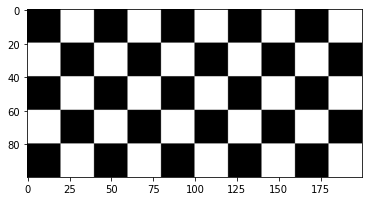

In [13]:
# Test your code here
# DO NOT DELETE
img = chessBoard(5,10)
plt.imshow(img, cmap = "gray")
plt.show()

The resulting image should be similar to the following image:

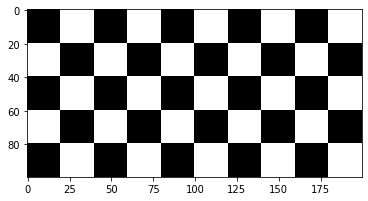

In [1]:
# Run the cell to show the test image
# DO NOT DELETE
from IPython.display import Image, display
display(Image("chessBoard_demo.png"))

<b>4. (15 pts)</b><br>
In this task, you will write a function ``editImage(img)`` to edit a stop sign image. You may assume that both files ``stop_sign.jpg`` and ``modified_stop_sign.jpg`` are present in the same directory as this notebook.
<br>


First, run the following cell that reads the file ``stop_sign.jpg`` and creates a three-dimensional NumPy array ``img`` that represents the stop sign image.

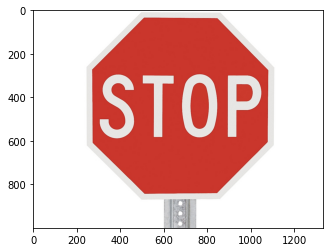

In [14]:
# RUN THIS FIRST
# DO NOT DELETE
import matplotlib.pyplot as plt
import numpy as np
img = plt.imread("stop_sign.jpg")
plt.imshow(img)
plt.show()

Next, define the ``editImage(img)`` function to
- flip the image horizontally,
- turn the background of the stop sign blue, and
- add a green rectangle to the bottom part of the stop sign.

After the function call ``editImage(img)``, the result should be similar to the one stored in the file ``modified_stop_sign.jpg``.

__Note__: 
1. For full credit, avoid using explicit for-loops and avoid the use of ``range``.
2. The exact location/size of the rectangle and the exact color of the background color do not matter.

In [118]:
# put your code here
def editImage(img):
    newImg = np.flip(img, 1).copy()

    rmask = newImg[:,:,0] > 150
    gmask = newImg[:,:,1] < 180 
    bmask = newImg[:,:,2] < 180
    mask = rmask & gmask & bmask
    newImg[mask] = [0,0,255]

    newImg[730:770,600:700] = [0,255,0]
    return newImg


Test it by running the cell below. The result should be similar to the one stored in the file ``modified_stop_sign.jpg``.

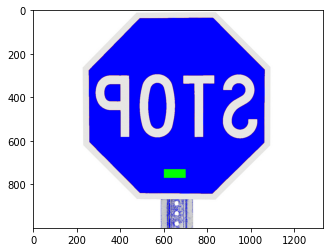

In [120]:
# TEST YOUR CODE HERE
# DO NOT DELETE
newImg =  editImage(img)
newImg
plt.imshow(newImg)
plt.show()

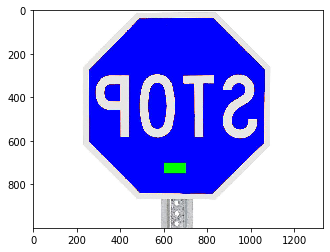

In [4]:
# Also, run this cell to show a sample modified stop sign image.
# DO NOT DELETE
test_modified_img = plt.imread("modified_stop_sign.jpg")
plt.imshow(test_modified_img)
plt.show()

<b>5. (17 pts)</b><br>

Implement a ``MyCalendar`` class to store your events. A new event can be added if adding the event will not cause a double booking. 

- Create an instance variable ``bookedTimes`` which is a list of tuples that stores the start and end times of all the booked events.
- Write a method ``book(start, end)`` where ``start`` and ``end`` are both positive integers. Formally, this represents a booking on the range of time `x` such that ``start <= x < end ``.

A double booking happens when two events have some non-empty intersection (that is, there is some time that is common to both events.) For instance, if there already exists a booking `(10,20)`, then adding `(15,25)` causes a double booking.

For each call to the method ``book``, return ``True`` if the event can be added to the calendar successfully without causing a double booking. Otherwise, return ``False`` and do not add the event to the calendar.

- Overload ``__str__`` method so that the user can print all the bookings, in ascending order with respect to the start time. 

If the calendar is empty, print `"No events booked yet"`.

__Note:__ for full credits, avoid using `sort` and `sorted` methods.

In [91]:
# put your code here
class MyCalendar:
    def __init__(self):
        self.bookedTimes = []
    
    def book(self, start, end):
        i = 0
        for e in self.bookedTimes:
            if end <= e[1] and end > e[0]:
                return False
            elif start >= e[0]:
                if start < e[1]:
                    return False
                else:
                    i += 1
            else:           # break when found a place to index
                break
            
        self.bookedTimes.insert(i, (start, end))
        return True

    def __str__(self):
        if not self.bookedTimes:
            return "No events booked yet"
        
        ret_str = ""
        for i in range(len(self.bookedTimes)):
            ret_str += f"Event{i+1}: {self.bookedTimes[i][0]}--{self.bookedTimes[i][1]}\n"
            
        return ret_str

Test your class by running the code below.

The result should be:

```
Initially:  No events booked yet.
---------------
The first booking attempt:  True
Current bookings:
Event1: 10--20
---------------
The second booking attempt:  False
Current bookings:
Event1: 10--20
---------------
The third booking attempt:  True
Current bookings:
Event1: 10--20
Event2: 20--30
```

In [92]:
# test your code here
# DO NOT DELETE
myCal = MyCalendar()
print("Initially: ")
print(myCal)
print("---------------")
print("The first booking attempt: ", myCal.book(10, 20))
print("Current bookings:")
print(myCal)
print("---------------")
print("The second booking attempt: ", myCal.book(15, 25))
print("Current bookings:")
print(myCal)
print("---------------")
print("The third booking attempt: ", myCal.book(20, 30))
print("Current bookings:")
print(myCal)

Initially: 
No events booked yet
---------------
The first booking attempt:  True
Current bookings:
Event1: 10--20

---------------
The second booking attempt:  False
Current bookings:
Event1: 10--20

---------------
The third booking attempt:  True
Current bookings:
Event1: 10--20
Event2: 20--30



Test the following cell as well.
The result should be:

```
Initially:  No events booked yet.
---------------
After processing all the booking attempts: 
Current bookings:
Event1: 1--7
Event2: 14--20
Event3: 20--29
Event4: 36--42
Event5: 44--50
```

In [93]:
# Run this cell as well
# DO NOT DELETE
BookingAttempts=[[20,29],[13,22],[44,50],[1,7],[2,10],[14,20],[19,25],[36,42],[45,50],[47,50],[39,45],[44,50],[16,25],[45,50],[45,50],[12,20],[21,29],[11,20],[12,17],[34,40],[10,18],[38,44],[23,32],[38,44],[15,20],[27,33],[34,42],[44,50],[35,40],[24,31]]
myCal2 = MyCalendar()
print("Initially: ")
print(myCal2)
print("---------------")
for event in BookingAttempts:
    myCal2.book(event[0],event[1])
print("After processing all the booking attempts: ")
print("Current bookings:")
print(myCal2)

Initially: 
No events booked yet
---------------
After processing all the booking attempts: 
Current bookings:
Event1: 1--7
Event2: 14--20
Event3: 20--29
Event4: 36--42
Event5: 44--50



**6. (16 pts)** 

Consider a dataset `sales_data.csv` which consists of property sales in Milwaukee, Wisconsin from 2002 to 2018. The features of these property sales are listed below:

- **Taxkey**: a unique identifier for the property
- **Nbhd**: integer identifying one of 591 neighborhoods
- **Stories**: number of stories
- **Year_Built**: the year the building was built
- **Nr_of_rms**: number of rooms
- **Fin_sqft**: finished square feet
- **Lotsize**: size of the lot in square feet
- **Sale_date**: the date of the sale in YYYY-MM-DD format
- **Sale_price**: sale price in US dollars

In [109]:
# Remember to run this cell
# DO NOT DELETE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
# Run this cell as well
# DO NOT DELETE
data = pd.read_csv("sales_data.csv")
data.head()

,Taxkey,Nbhd,Stories,Year_Built,Nr_of_rms,Fin_sqft,Lotsize,Sale_date,Sale_price
0,3230461110,6258,2.0,1880,0,1840,12750,2002-01-01,15900
1,3590192000,6262,2.0,1876,0,6377,11840,2002-01-01,850000
2,4161194000,6272,1.0,1954,0,5022,9700,2002-01-01,119000
3,1719836000,6218,2.0,1955,0,6420,8792,2002-01-01,210000
4,3480290000,6254,2.0,1909,0,5956,4840,2002-01-01,48500


(a) Create a histogram for the `Lotsize` feature. Specify labels for the x and y axis. The histogram only needs to include those entries that satisfy `Lotsize` <= 30000. 

_Hint:_ this [link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) is be useful. You may use ~1000 bins for this histogram.

In [ ]:
# put your code here

(b) Sometimes missing numbers are entered as zeros.

How many missing numbers (numbers entered as zeros) are there in the `Lotsize` feature? Find and print this number in the following cell. 

In [ ]:
# put your code here

(c) We will then remove rows with zeros in `Fin_sqft`, `Lotsize`, or `Sale_price`, as these are the numerical variables where erroneous zero values can affect further analysis. We will also remove rows with the feature `Year_Built <= 1800`. Create a separate DataFrame named `data_clean` to store the resulting table.

In [ ]:
# put your code here

(d)  What's the highest `Sale_price` of all the properties built from year 1880 to 1950? Print this `Sale_price` below.

In [ ]:
# put your code here

(e) Group the data by `Year_Built` and list the top five `Year_Built` in terms of the average `Sale_price` for all the properties built in that year. Your result may be similar to: 
```
              Sale_price
Year_Built              
2016        6.830281e+06
2007        3.469962e+06
1987        3.197780e+06
1866        2.462000e+06
2000        2.187621e+06

```

**Note**: 
1. Depending on the previous steps, your result may be different from what's given.
2. For full credits, avoid using any explicit for loops.

In [ ]:
# put your code here

**7. (20 pts)** 

For this problem, you will use Tkinter to create a proof of concept for "Stipple Something”, an app in which the user paints with small dots in order to create an image, as illustrated in the following figure:

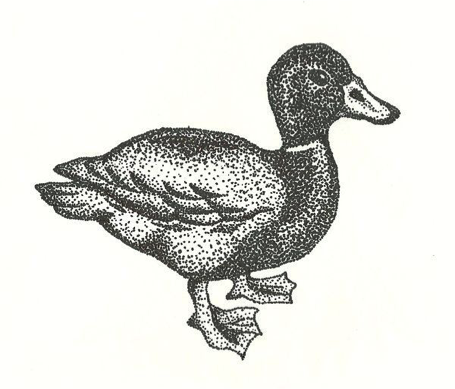

In [111]:
# RUN THIS CELL
# DO NOT DELETE
from IPython.display import Image
Image("stippling.png", width = 200)

Write a program that accomplishes the following objectives:

- Create a GUI for Stipple Something. The GUI should have a white drawing area (500 px by 500 px) on which the user can click to create small (~10 px diameter) dots centered at the tip of the cursor. The default color of the dots is blue. The title of the GUI window should be "Stipple Something".
- Add `load` and `save` buttons below the drawing area and implement their functionality (e.g. user can "save", then change the drawing or even restart the program, then "load" the original drawing). You do not need to prompt the user for the directory or filename; you can hard-code a filename in your program to be used for both. The demo in `stippling_demo.wmv` uses `generated.py` to save the drawing, but you can use other file types as well.
- Create a `clear` button to erase the drawing area and/or other features. 
    _Hint:_ [this link](https://www.geeksforgeeks.org/how-to-clear-tkinter-canvas/) is helpful.
- Create a `color` button to randomly change the color of all the existing dots in the drawing area. Any new dots created in the drawing area will also take this new color.
- A perfect example GUI is shown in `stippling_demo.wmv`. 

__You can test your code in whatever program you wish, but you need to copy and paste your code here.__